La fecha en que se realizó este análisis es:  2022-10-14
Formato AAAA-MM-DD


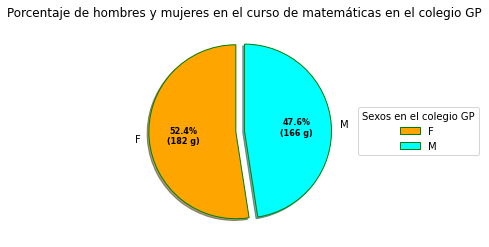

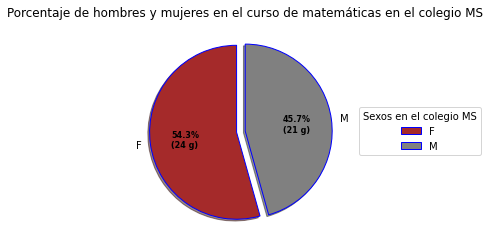

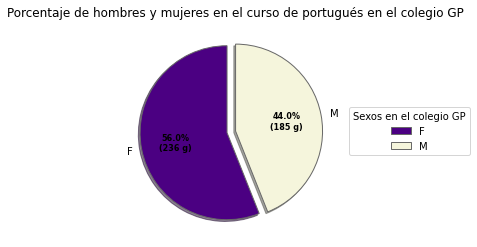

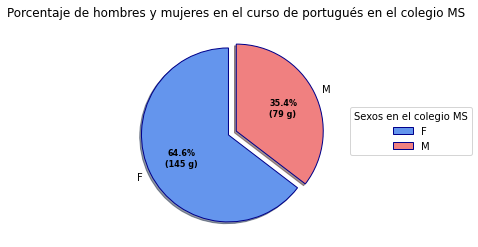

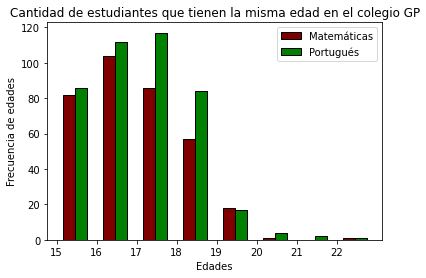

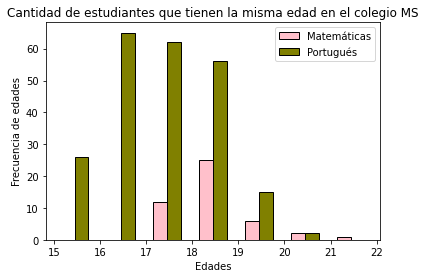

El promedio de edades del curso de matemáticas es:
 16.52 
 y el promedio de edades del curso de portugués es:
 16.67 , en la escuela GP.

El promedio de edades del curso de matemáticas es:
 18.02 
 y el promedio de edades del curso de portugués es:
 16.89 , en la escuela MS.

El promedio de notas G1 es: 10.94 
 el de notas G2 es: 10.78 
 y el de notas G3 es: 10.49 , para el curso de matemáticas en el colegio GP.

El promedio de notas G1 es: 10.67 
 el de notas G2 es: 10.2 
 y el de notas G3 es: 9.85 , para el curso de matemáticas en el colegio MS.

El promedio de notas G1 es: 11.99 
 el de notas G2 es: 12.14 
 y el de notas G3 es: 12.58 , para el curso de portugués en el colegio GP.

El promedio de notas G1 es: 10.3 
 el de notas G2 es: 10.5 
 y el de notas G3 es: 10.65 , para el curso de portugués en el colegio MS.


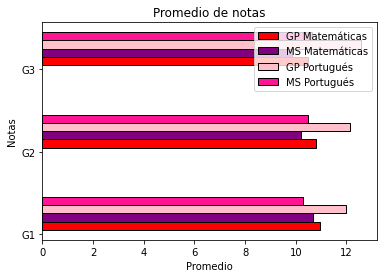

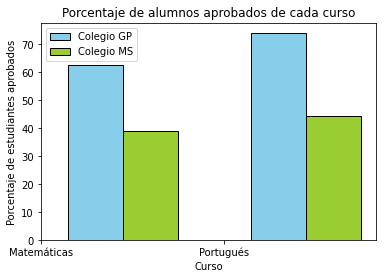

In [1]:
#FECHA EN LA QUE SE EJECUTA EL SCRIPT
from datetime import date

today = date.today()
print("La fecha en que se realizó este análisis es: ", today)
print("Formato AAAA-MM-DD")


####################################################
#CREACIÓN DE DATAFRAMES
import pandas as pd

def open_csv(file):
    data=pd.read_csv(file,sep=';')
    return data

#DATA FRAMES MATEMÁTICAS INICIAL
file1 = "student-mat.csv"
data_math=open_csv(file1)

#Creación de diccionario
s_math_school=data_math["school"]
s_math_sex=data_math["sex"]
s_math_age=data_math["age"]
s_math_address=data_math["address"]
s_math_Pstatus=data_math["Pstatus"]
s_math_guardian=data_math["guardian"]
s_math_traveltime=data_math["traveltime"]
s_math_studytime=data_math["studytime"]
s_math_failures=data_math["failures"]
s_math_paid=data_math["paid"]
s_math_internet=data_math["internet"]
s_math_health=data_math["health"]
s_math_absences=data_math["absences"]
s_math_G1=data_math["G1"]
s_math_G2=data_math["G2"]
s_math_G3=data_math["G3"]

#Creación de diccionario de series
serie_data_math={"school":s_math_school,
                 "sex":s_math_sex,
                 "age":s_math_age,
                 "address":s_math_address,
                 "Pstatus":s_math_Pstatus,
                 "guardian":s_math_guardian,
                 "traveltime":s_math_traveltime,
                 "studytime":s_math_studytime,
                 "failures":s_math_failures,
                 "paid":s_math_paid,
                 "internet":s_math_internet,
                 "health":s_math_health,
                 "absences":s_math_absences,
                 "G1":s_math_G1,
                 "G2":s_math_G2,
                 "G3":s_math_G3}

#Conversión del diccionario en dataframe
DataFrameMath=pd.DataFrame(serie_data_math)

#División del data frame del curso de matemáticas para cada escuela
GP_Math=DataFrameMath[DataFrameMath['school']=='GP']
MS_Math=DataFrameMath[DataFrameMath['school']=='MS']

#Hacer que los index empiecen en 0
MS_Math=MS_Math.reset_index(drop=True)

####################################################
#DATA FRAMES PORTUGUÉS INICIAL
file2 = "student-por.csv"
data_por=open_csv(file2)

#Creación de diccionario
s_por_school=data_por["school"]
s_por_sex=data_por["sex"]
s_por_age=data_por["age"]
s_por_address=data_por["address"]
s_por_Pstatus=data_por["Pstatus"]
s_por_guardian=data_por["guardian"]
s_por_traveltime=data_por["traveltime"]
s_por_studytime=data_por["studytime"]
s_por_failures=data_por["failures"]
s_por_paid=data_por["paid"]
s_por_internet=data_por["internet"]
s_por_health=data_por["health"]
s_por_absences=data_por["absences"]
s_por_G1=data_por["G1"]
s_por_G2=data_por["G2"]
s_por_G3=data_por["G3"]

#Creación de diccionario de series
serie_data_por={"school":s_por_school,
                 "sex":s_por_sex,
                 "age":s_por_age,
                 "address":s_por_address,
                 "Pstatus":s_por_Pstatus,
                 "guardian":s_por_guardian,
                 "traveltime":s_por_traveltime,
                 "studytime":s_por_studytime,
                 "failures":s_por_failures,
                 "paid":s_por_paid,
                 "internet":s_por_internet,
                 "health":s_por_health,
                 "absences":s_por_absences,
                 "G1":s_por_G1,
                 "G2":s_por_G2,
                 "G3":s_por_G3}

#Conversión del diccionario en dataframe
DataFramePor=pd.DataFrame(serie_data_por)

#División del data frame del curso de matemáticas para cada escuela
GP_Por=DataFramePor[DataFramePor['school']=='GP']
MS_Por=DataFramePor[DataFramePor['school']=='MS']

#Hacer que los index empiecen en 0
MS_Por=MS_Por.reset_index(drop=True)


####################################################
#VERIFICACIÓN DE VALORES NULOS
GP_Math=GP_Math.dropna()
MS_Math=MS_Math.dropna()
GP_Por=GP_Por.dropna()
MS_Por=MS_Por.dropna()


####################################################
#GRÁFICOS CIRCULARES DE PORCENTAJE DE ESTUDIANTES HOMBRES Y MUJERES POR ESCUELA DE CADA CURSO
from matplotlib import pyplot as plt
import numpy as np

#GRÁFICA 1
#Contar la cantidad de F y M que hay en la columna sex, GP, MATH
F_en_GP_Math=GP_Math.sex.value_counts().F
M_en_GP_Math=GP_Math.sex.value_counts().M

#Crear dataset
Sexo_GP_Math=['F','M']
data_GP_Math=[F_en_GP_Math,M_en_GP_Math]

#Personalizaciones del gráfico 1
explode = (0.1, 0.0)
colors = ( "orange", "cyan")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

#Creación de la gráfica
fig, ax = plt.subplots(figsize =(4, 4))
wedges, texts, autotexts = ax.pie(data_GP_Math,
                                  autopct = lambda pct: func(pct, data_GP_Math),
                                  explode = explode,
                                  labels = Sexo_GP_Math,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#Leyendas
ax.legend(wedges, Sexo_GP_Math,
          title ="Sexos en el colegio GP",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Porcentaje de hombres y mujeres en el curso de matemáticas en el colegio GP")
 
plt.show()

#GRÁFICO 2
#Contar la cantidad de F y M que hay en la columna sex, MS, MATH
F_en_MS_Math=MS_Math.sex.value_counts().F
M_en_MS_Math=MS_Math.sex.value_counts().M

#Crear dataset
Sexo_MS_Math=['F','M']
data_MS_Math=[F_en_MS_Math,M_en_MS_Math]

#Personalizaciones del gráfico 2
explode = (0.1, 0.0)
colors = ( "brown", "grey")
wp = { 'linewidth' : 1, 'edgecolor' : "blue" }


#Creación de la gráfica
fig, ax = plt.subplots(figsize =(4, 4))
wedges, texts, autotexts = ax.pie(data_MS_Math,
                                  autopct = lambda pct: func(pct, data_MS_Math),
                                  explode = explode,
                                  labels = Sexo_MS_Math,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#Leyendas
ax.legend(wedges, Sexo_MS_Math,
          title ="Sexos en el colegio MS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Porcentaje de hombres y mujeres en el curso de matemáticas en el colegio MS")
 
plt.show()

#GRÁFICA 3
#Contar la cantidad de F y M que hay en la columna sex, GP, POR
F_en_GP_Por=GP_Por.sex.value_counts().F
M_en_GP_Por=GP_Por.sex.value_counts().M

#Crear dataset
Sexo_GP_Por=['F','M']
data_GP_Por=[F_en_GP_Por,M_en_GP_Por]

#Personalizacoones del gráfico 3
explode = (0.1, 0.0)
colors = ( "indigo", "beige")
wp = { 'linewidth' : 1, 'edgecolor' : "dimgray" }


#Creación de la gráfica
fig, ax = plt.subplots(figsize =(4, 4))
wedges, texts, autotexts = ax.pie(data_GP_Por,
                                  autopct = lambda pct: func(pct, data_GP_Por),
                                  explode = explode,
                                  labels = Sexo_MS_Math,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#Leyendas
ax.legend(wedges, Sexo_MS_Math,
          title ="Sexos en el colegio GP",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Porcentaje de hombres y mujeres en el curso de portugués en el colegio GP")
 
plt.show()

#GRÁFICA 4
#Contar la cantidad de F y M que hay en la columna sex, MS, POR
F_en_MS_Por=MS_Por.sex.value_counts().F
M_en_MS_Por=MS_Por.sex.value_counts().M

#Crear dataset
Sexo_MS_Por=['F','M']
data_MS_Por=[F_en_MS_Por,M_en_MS_Por]

#Personalizacoones del gráfico 4
explode = (0.1, 0.0)
colors = ( "cornflowerblue", "lightcoral")
wp = { 'linewidth' : 1, 'edgecolor' : "darkblue" }


#Creación de la gráfica
fig, ax = plt.subplots(figsize =(4, 4))
wedges, texts, autotexts = ax.pie(data_MS_Por,
                                  autopct = lambda pct: func(pct, data_MS_Por),
                                  explode = explode,
                                  labels = Sexo_MS_Math,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#Leyendas
ax.legend(wedges, Sexo_MS_Math,
          title ="Sexos en el colegio MS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Porcentaje de hombres y mujeres en el curso de portugués en el colegio MS")
 
plt.show()


####################################################
#GRÁFICOS DE BARRAS DE ESTUDIANTES CON LA MISMA EDAD POR ESCUELA
#Contar la frecuencia de edades que hay en la columna age, para GP
x1=GP_Math['age'].value_counts().sort_index()
val1=list(x1.values)
val1.insert(6,0)

x2=GP_Por['age'].value_counts().sort_index()
edades=list(x2.index)
val2=list(x2.values)

#Graficar 
x_axis=np.arange(len(edades))

plt.bar(x_axis +0.3, val1,color='maroon', width=0.3,edgecolor='black', label = 'Matemáticas')
plt.bar(x_axis +0.3*2, val2, color='green',width=0.3,edgecolor='black', label = 'Portugués')

plt.xlabel("Edades")
plt.ylabel("Frecuencia de edades")
plt.title("Cantidad de estudiantes que tienen la misma edad en el colegio GP")
plt.xticks(x_axis,edades)
plt.legend()
plt.show()

#Contar la frecuencia de edades que hay en la columna age, para MS
x3=MS_Math['age'].value_counts().sort_index()
val3=list(x3.values)
val3.insert(0,0)
val3.insert(1,0)

x4=MS_Por['age'].value_counts().sort_index()
edades2=list(x4.index)
edades2.append(21)

val4=list(x4.values)
val4.insert(6,0)

#Graficar 
x_axis2=np.arange(len(edades2))

plt.bar(x_axis2 +0.3, val3,color='pink', width=0.3,edgecolor='black', label = 'Matemáticas')
plt.bar(x_axis2 +0.3*2, val4, color='olive',width=0.3,edgecolor='black', label = 'Portugués')

plt.xlabel("Edades")
plt.ylabel("Frecuencia de edades")
plt.title("Cantidad de estudiantes que tienen la misma edad en el colegio MS")
plt.xticks(x_axis,edades)
plt.legend()
plt.show()

#################################################
#PROMEDIO DE EDADES DE CADA CURSO DE CADA ESCUELA
prom_GP_Math=round(GP_Math['age'].mean(),2)
prom_GP_Por=round(GP_Por['age'].mean(),2)
print("El promedio de edades del curso de matemáticas es:\n",prom_GP_Math, "\n y el promedio de edades del curso de portugués es:\n",prom_GP_Por, ", en la escuela GP.")

print("")
prom_MS_Math=round(MS_Math['age'].mean(),2)
prom_MS_Por=round(MS_Por['age'].mean(),2)
print("El promedio de edades del curso de matemáticas es:\n",prom_MS_Math, "\n y el promedio de edades del curso de portugués es:\n",prom_MS_Por, ", en la escuela MS.")

#################################################
#PROMEDIO DE LAS NOTAS G1, G2, G3 DE CADA CURSO DE CADA ESCUELA
print("")
promG1_GP_Math=round(GP_Math['G1'].mean(),2)
promG2_GP_Math=round(GP_Math['G2'].mean(),2)
promG3_GP_Math=round(GP_Math['G3'].mean(),2)
print("El promedio de notas G1 es:",promG1_GP_Math,"\n el de notas G2 es:",promG2_GP_Math,"\n y el de notas G3 es:",promG3_GP_Math,", para el curso de matemáticas en el colegio GP." )

print("")
promG1_MS_Math=round(MS_Math['G1'].mean(),2)
promG2_MS_Math=round(MS_Math['G2'].mean(),2)
promG3_MS_Math=round(MS_Math['G3'].mean(),2)
print("El promedio de notas G1 es:",promG1_MS_Math,"\n el de notas G2 es:",promG2_MS_Math,"\n y el de notas G3 es:",promG3_MS_Math,", para el curso de matemáticas en el colegio MS." )

print("")
promG1_GP_Por=round(GP_Por['G1'].mean(),2)
promG2_GP_Por=round(GP_Por['G2'].mean(),2)
promG3_GP_Por=round(GP_Por['G3'].mean(),2)
print("El promedio de notas G1 es:",promG1_GP_Por,"\n el de notas G2 es:",promG2_GP_Por,"\n y el de notas G3 es:",promG3_GP_Por,", para el curso de portugués en el colegio GP." )

print("")
promG1_MS_Por=round(MS_Por['G1'].mean(),2)
promG2_MS_Por=round(MS_Por['G2'].mean(),2)
promG3_MS_Por=round(MS_Por['G3'].mean(),2)
print("El promedio de notas G1 es:",promG1_MS_Por,"\n el de notas G2 es:",promG2_MS_Por,"\n y el de notas G3 es:",promG3_MS_Por,", para el curso de portugués en el colegio MS." )

##########################################
#PROMEDIO DE LAS NOTAS EN UN GRÁFICO DE BARRAS HORIZONTAL
labels_notasG=['G1','G2','G3']
notasG_GP_Math=[promG1_GP_Math,promG2_GP_Math,promG3_GP_Math]
notasG_MS_Math=[promG1_MS_Math,promG2_MS_Math,promG3_MS_Math]
notasG_GP_Por=[promG1_GP_Por,promG2_GP_Por,promG3_GP_Por]
notasG_MS_Por=[promG1_MS_Por,promG2_MS_Por,promG3_MS_Por]

width=0.1

y_axis=np.arange(len(labels_notasG))
plt.barh(y_axis +width, notasG_GP_Math,width,color='red',edgecolor='black', label = 'GP Matemáticas')
plt.barh(y_axis +width*2, notasG_MS_Math,width,color='purple',edgecolor='black', label = 'MS Matemáticas')
plt.barh(y_axis +width*3, notasG_GP_Por,width,color='pink',edgecolor='black', label = 'GP Portugués')
plt.barh(y_axis +width*4, notasG_MS_Por,width,color='deeppink',edgecolor='black', label = 'MS Portugués')

plt.xlabel("Promedio")
plt.ylabel("Notas")
plt.title("Promedio de notas")
plt.yticks(y_axis,labels_notasG)
plt.legend()
plt.show()

#####################################
#PORCENTAJES DE ASISTENCIA
#Búsqueda de valores máximos
Max_GP_Math=GP_Math['absences'].max()
Max_MS_Math=MS_Math['absences'].max()
Max_GP_Por=GP_Por['absences'].max()
Max_MS_Por=MS_Por['absences'].max()

#Cálculo de porcentajes
GP_Math['Extra (%)']=((1-(GP_Math['absences']/Max_GP_Math))*100).round(2)
MS_Math['Extra (%)']=((1-(MS_Math['absences']/Max_MS_Math))*100).round(2)
GP_Por['Extra (%)']=((1-(GP_Por['absences']/Max_GP_Por))*100).round(2)
MS_Por['Extra (%)']=((1-(MS_Por['absences']/Max_MS_Por))*100).round(2)

#Mover las columnas nuevas
mid=GP_Math['Extra (%)']
GP_Math.drop(labels=['Extra (%)'],axis=1,inplace=True)
GP_Math.insert(13,'Extra (%)',mid)

mid2=MS_Math['Extra (%)']
MS_Math.drop(labels=['Extra (%)'],axis=1,inplace=True)
MS_Math.insert(13,'Extra (%)',mid2)

mid3=GP_Por['Extra (%)']
GP_Por.drop(labels=['Extra (%)'],axis=1,inplace=True)
GP_Por.insert(13,'Extra (%)',mid3)

mid4=MS_Por['Extra (%)']
MS_Por.drop(labels=['Extra (%)'],axis=1,inplace=True)
MS_Por.insert(13,'Extra (%)',mid4)

#################################################
#Determinar el estatus del estudiante en el curso
condiciones1=[
    (GP_Math['Extra (%)']<80),
    (GP_Math['Extra (%)']>=80) & (GP_Math['G3']<10),
    (GP_Math['Extra (%)']>=80) & (GP_Math['G3']>=10) & (GP_Math['G3']<15),
    (GP_Math['Extra (%)']>=80) & (GP_Math['G3']>=15)
]
valores=[0,0,1,1]
GP_Math['Approved']=np.select(condiciones1,valores)

condiciones2=[
    (MS_Math['Extra (%)']<80),
    (MS_Math['Extra (%)']>=80) & (MS_Math['G3']<10),
    (MS_Math['Extra (%)']>=80) & (MS_Math['G3']>=10) & (MS_Math['G3']<15),
    (MS_Math['Extra (%)']>=80) & (MS_Math['G3']>=15)
]
MS_Math['Approved']=np.select(condiciones2,valores)

condiciones3=[
    (GP_Por['Extra (%)']<80),
    (GP_Por['Extra (%)']>=80) & (GP_Por['G3']<10),
    (GP_Por['Extra (%)']>=80) & (GP_Por['G3']>=10) & (GP_Por['G3']<15),
    (GP_Por['Extra (%)']>=80) & (GP_Por['G3']>=15)
]
GP_Por['Approved']=np.select(condiciones3,valores)

condiciones4=[
    (MS_Por['Extra (%)']<80),
    (MS_Por['Extra (%)']>=80) & (MS_Por['G3']<10),
    (MS_Por['Extra (%)']>=80) & (MS_Por['G3']>=10) & (MS_Por['G3']<15),
    (MS_Por['Extra (%)']>=80) & (MS_Por['G3']>=15)
]
MS_Por['Approved']=np.select(condiciones4,valores)

##################################################
#Graficar el porcentaje de alumnos aprobados de cada curso
contador_aprobados1=GP_Math[GP_Math.Approved==1].shape[0]
porcentaje1=round((contador_aprobados1/len(GP_Math.index))*100,2)

contador_aprobados2=MS_Math[MS_Math.Approved==1].shape[0]
porcentaje2=round((contador_aprobados2/len(MS_Math.index))*100,2)

contador_aprobados3=GP_Por[GP_Por.Approved==1].shape[0]
porcentaje3=round((contador_aprobados3/len(GP_Por.index))*100,2)

contador_aprobados4=MS_Por[MS_Por.Approved==1].shape[0]
porcentaje4=round((contador_aprobados4/len(MS_Por.index))*100,2)

#Dataset
porcentajeGP=[porcentaje1,porcentaje3]
porcentajeMS=[porcentaje2,porcentaje4]
materias=['Matemáticas','Portugués']

#Graficar
x_axis=np.arange(len(materias))
plt.bar(x_axis +0.3, porcentajeGP,color='skyblue', width=0.3,edgecolor='black', label = 'Colegio GP')
plt.bar(x_axis +0.3*2, porcentajeMS, color='yellowgreen',width=0.3,edgecolor='black', label = 'Colegio MS')

plt.xlabel("Curso")
plt.ylabel("Porcentaje de estudiantes aprobados")
plt.title("Porcentaje de alumnos aprobados de cada curso")
plt.xticks(x_axis,materias)
plt.legend()
plt.show()

#######################################3
#ARCHIVO CSV
nombrearchivo="Resultado + "+str(today)
GP_Math.to_csv(nombrearchivo+".csv",mode="w",index=False)
MS_Math.to_csv(nombrearchivo+".csv",mode="a",index=False)
GP_Por.to_csv(nombrearchivo+".csv",mode="a",index=False)
MS_Por.to_csv(nombrearchivo+".csv",mode="a",index=False)